TASK


1.- What types of restaurant do the majority of customers order from ?

2.- How many votes have each type of restaurant received from customers ?

3.- What are the ratings that majority of restaurant have receive ?

4.- Zomato has observed that most couples order most of their food online. What are their average spendings ?

5.- Which Mode (online or offline) has received the moximum rating ?

6.- Which types of restaurant received more online orders, so that Zomato can prefer customers with some good offers.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Zomato data  (2).csv")

In [18]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [19]:
#Converting the data type of column-'rate'

def handleRate(value):
    value= str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)

In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'types of restaurant')

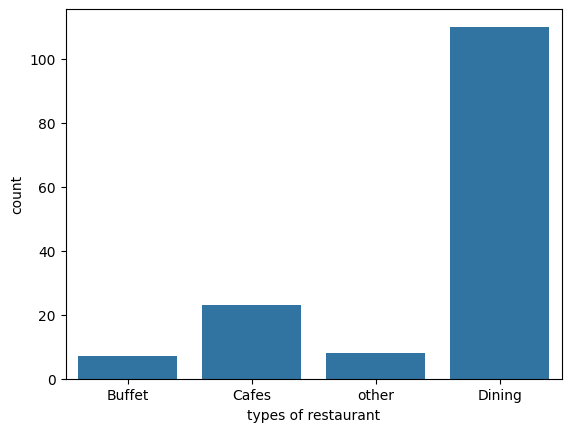

In [21]:
#Type of restaurant mostly people order from


sns.countplot(x=df['listed_in(type)'])
plt.xlabel('types of restaurant')

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'No of votes')

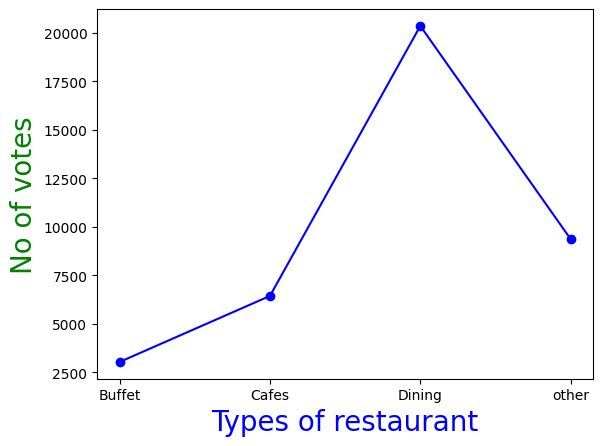

In [23]:
#No of votes each types of restaurant received 

grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="blue", marker='o')
plt.xlabel('Types of restaurant', c='blue', size=20)
plt.ylabel('No of votes', c='green', size=20)



In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


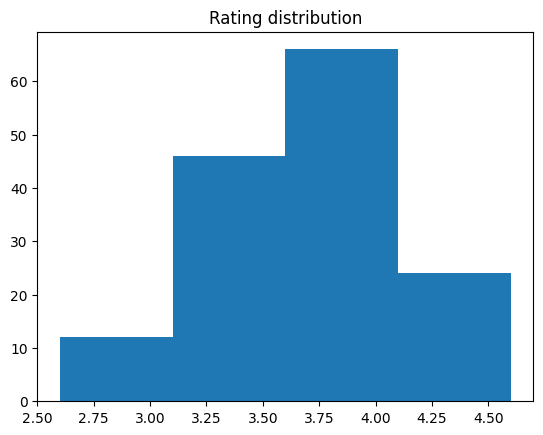

In [25]:
#Rating distribution

plt.hist(df['rate'], bins=4)
plt.title('Rating distribution')
plt.show()

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

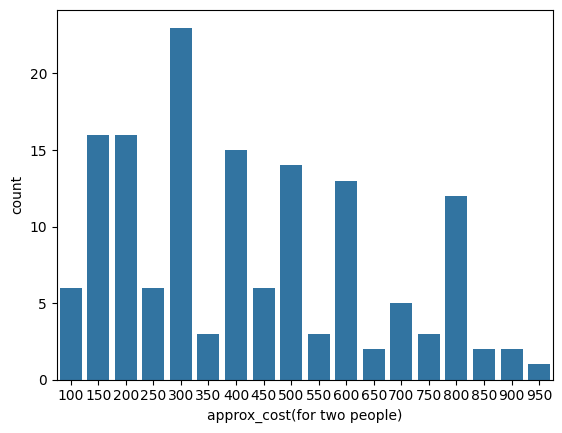

In [27]:
#Average spendings by couples

couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

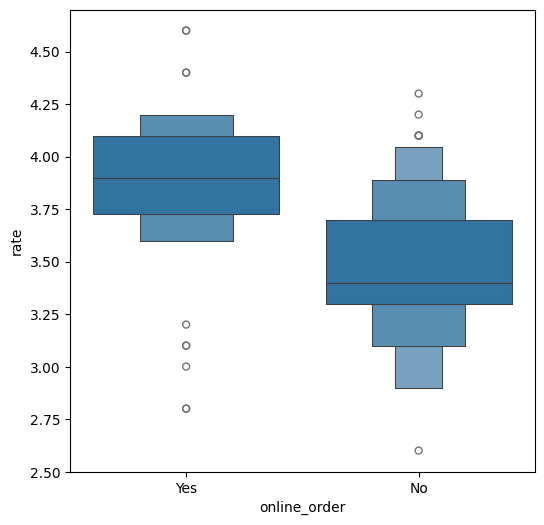

In [29]:
#which mode receives maximum rating

plt.figure(figsize= (6,6))
sns.boxenplot(x='online_order', y= 'rate', data= df)

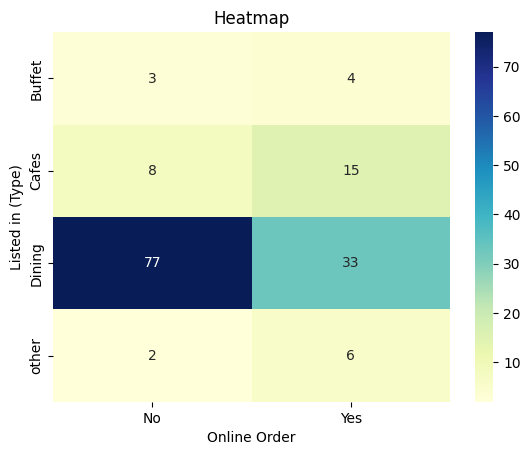

In [30]:
#restaurants with more online orders


pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap= 'YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in (Type)')
plt.show()


Conclusion 

1.- Majority of customers order from Dining types of restaurant.

2.- Dining type restaurants receive maximum votes.

3.- The majority restaurants received ratings between 3.5 to 4.

4.- Most of the Couples spend average 300 rupees on each orders.

5.- Online order receives higher ratings than offline order.

6.- Dining Restaurat receives more online orders.